In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [33]:
# Load the datasets
total_ev_vehicles = pd.read_csv('total_ev_vehicles.csv')
charging_stats = pd.read_csv('charging_stats.csv')

In [34]:
# Merge the datasets based on the region
data = pd.merge(total_ev_vehicles[['Region']], charging_stats, on='Region')

In [35]:
# Preprocess the data
data = data.drop('Region', axis=1)  # Drop the region column
data = data.replace(',', '', regex=True).astype(float)  # Remove commas and convert to float
data_scaled = StandardScaler().fit_transform(data)

In [36]:
# Perform Principal Component Analysis (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
data['PC1'] = pca_result[:, 0]
data['PC2'] = pca_result[:, 1]

C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

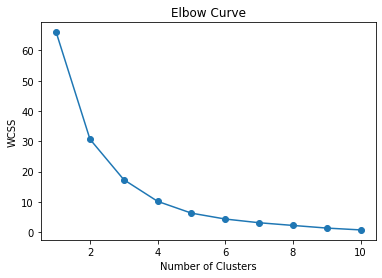

In [37]:
# Elbow Curve
wcss = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
# K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_scaled)
data['KMeans Cluster'] = kmeans.labels_

C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


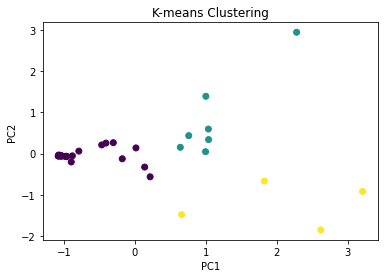

In [39]:
plt.scatter(data['PC1'], data['PC2'], c=data['KMeans Cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [40]:
# Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(data_scaled)
data['GMM Cluster'] = gmm.predict(data_scaled)

C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


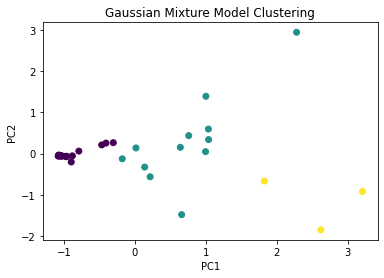

In [41]:
plt.scatter(data['PC1'], data['PC2'], c=data['GMM Cluster'], cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

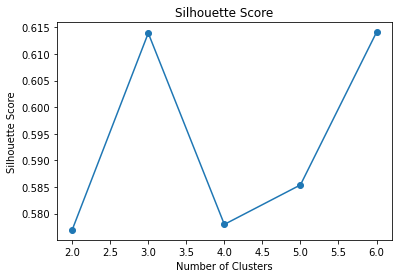

In [42]:
# Calculate Silhouette Scores
silhouette_scores = []
for n in range(2, 7):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

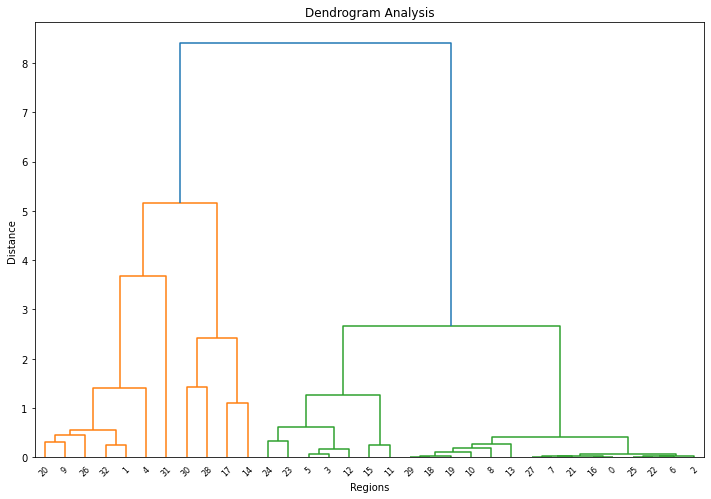

In [43]:
# Hierarchical Clustering using Dendrogram Analysis
linked = linkage(data_scaled, 'ward')
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram Analysis')
plt.xlabel('Regions')
plt.ylabel('Distance')
plt.show()

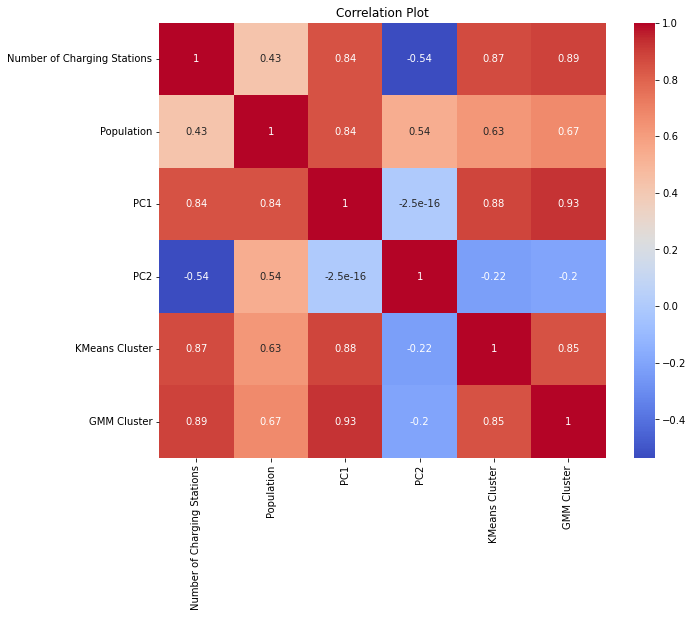

In [44]:
# Correlation Plot
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()

In [45]:
import json

# Create a dictionary to store the results
results = {
    'elbow_curve': {
        'x': list(range(1, 11)),
        'y': wcss
    },
    'kmeans_clusters': {
        'labels': kmeans.labels_.tolist()
    },
    'gmm_clusters': {
        'labels': gmm.predict(data_scaled).tolist()
    },
    'silhouette_scores': {
        'x': list(range(2, 7)),
        'y': silhouette_scores
    },
    'dendrogram': {
        'linked': linked.tolist()
    },
    'pca': {
        'PC1': pca_result[:, 0].tolist(),
        'PC2': pca_result[:, 1].tolist()
    }
}

# Save the results dictionary as JSON
with open('market_segmentation_results.json', 'w') as file:
    json.dump(results, file)
